[2024/01/26 14:23:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

[2024/01/26 14:23:56] ppocr DEBUG: dt_boxes num : 54, elapsed : 0.9341611862182617
[2024/01/26 14:23:57] ppocr DEBUG: cls num  : 54, elapsed : 0.5455582141876221
[2024/01/26 14:24:20] ppocr DEBUG: rec_res num  : 54, elapsed : 23.45667791366577


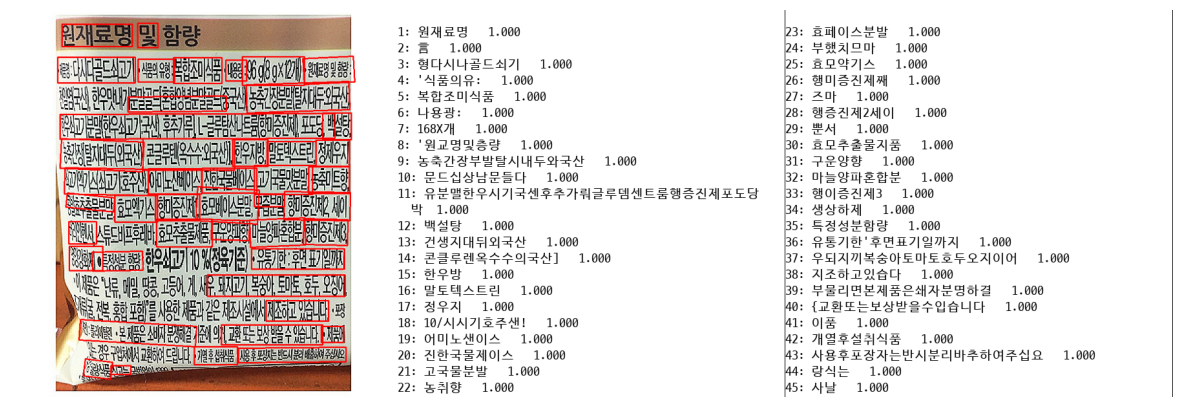

[[[[[107.0, 31.0], [252.0, 31.0], [252.0, 77.0], [107.0, 77.0]],
   ('원재료명', 0.9993194341659546)],
  [[[263.0, 29.0], [305.0, 29.0], [305.0, 79.0], [263.0, 79.0]],
   ('言', 0.8751625418663025)],
  [[[98.0, 99.0], [258.0, 99.0], [258.0, 152.0], [98.0, 152.0]],
   ('형다시나골드쇠기', 0.7655125260353088)],
  [[[264.0, 103.0], [339.0, 103.0], [339.0, 150.0], [264.0, 150.0]],
   ("'식품의유:", 0.8883986473083496)],
  [[[337.0, 100.0], [437.0, 100.0], [437.0, 153.0], [337.0, 153.0]],
   ('복합조미식품', 0.9941744804382324)],
  [[[445.0, 105.0], [488.0, 105.0], [488.0, 148.0], [445.0, 148.0]],
   ('나용광:', 0.8234691023826599)],
  [[[479.0, 98.0], [607.0, 98.0], [607.0, 157.0], [479.0, 157.0]],
   ('168X개', 0.528893768787384)],
  [[[604.0, 102.0], [708.0, 97.0], [711.0, 150.0], [607.0, 155.0]],
   ("'원교명및층량", 0.5250087976455688)],
  [[[487.0, 156.0], [699.0, 149.0], [701.0, 207.0], [489.0, 214.0]],
   ('농축간장부발탈시내두와국산', 0.8201970458030701)],
  [[[243.0, 181.0], [446.0, 179.0], [446.0, 210.0], [243.0, 212.0]],
  

In [12]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'

# 이미지 전처리 (선명하게)
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# 원본 이미지 로드 및 전처리
original_img = cv2.imread(img_path)
sharp_img = sharpen_image(original_img)

# PaddleOCR 인스턴스 생성 및 텍스트 추출
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)
ocr_result = ocr.ocr(sharp_img, cls=True)

# 결과 이미지 생성 및 시각화
extracted_boxes = [line[0] for line in ocr_result[0]]
extracted_txts = [line[1][0] for line in ocr_result[0]]
sharp_img_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
im_show = draw_ocr(Image.fromarray(sharp_img_rgb), extracted_boxes, extracted_txts, font_path='/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
im_show = Image.fromarray(im_show)

# 결과 이미지 표시
plt.figure(figsize=(15, 10))
plt.imshow(im_show)
plt.axis('off')
plt.show()

ocr_result


In [14]:
print(extracted_txts)

['원재료명', '言', '형다시나골드쇠기', "'식품의유:", '복합조미식품', '나용광:', '168X개', "'원교명및층량", '농축간장부발탈시내두와국산', '문드십상남문들다', '유분맬한우시기국센후추가뤄글루뎀센트룸행증진제포도당박', '백설탕', '건생지대뒤외국산', '콘클루렌옥수수의국산]', '한우방', '말토텍스트린', '정우지', '10/시시기호주샌!', '어미노샌이스', '진한국물제이스', '고국물분발', '농취향', '효페이스분발', '부했치므마', '효모약기스', '행미증진제째', '즈마', '행증진제2세이', '뿐서', '효모추출물지품', '구운양향', '마늘양파혼합분', '행이증진제3', '생상하제', '특정성분함량', "유통기한'후면표기일까지", '우되지끼복숭아토마토호두오지이어', '지조하고있습다', '부물리면본제품은쇄자분명하결', '{교환또는보상받을수입습니다', '이품', '개열후설취식품', '사용후포장자는반시분리바추하여주십요', '랑식는', '사날']


[2024/01/26 13:45:30] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

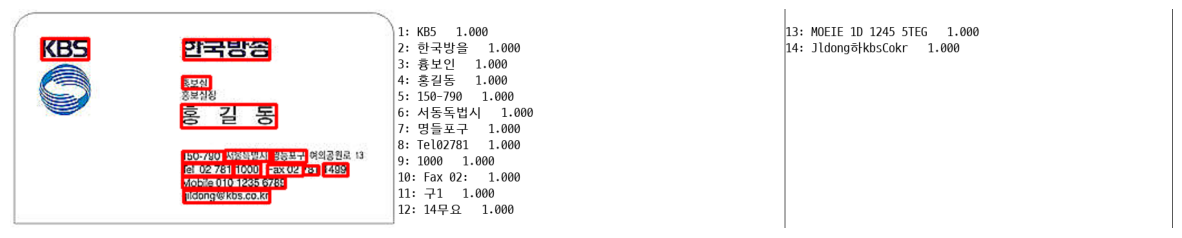

In [7]:
import cv2
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 경로
img_path = './imgs/namecard.jpg'

# 이미지 전처리 (선명하게)
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# 원본 이미지 로드 및 전처리
original_img = cv2.imread(img_path)
sharp_img = sharpen_image(original_img)

# PaddleOCR 인스턴스 생성 및 텍스트 추출
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)
ocr_result = ocr.ocr(sharp_img, cls=True)

# 결과 이미지 생성 및 시각화
extracted_boxes = [line[0] for line in ocr_result[0]]
extracted_txts = [line[1][0] for line in ocr_result[0]]
sharp_img_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
im_show = draw_ocr(Image.fromarray(sharp_img_rgb), extracted_boxes, extracted_txts, font_path='/Users/kimsy/Library/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc')
im_show = Image.fromarray(im_show)

# 결과 이미지 표시
plt.figure(figsize=(15, 10))
plt.imshow(im_show)
plt.axis('off')
plt.show()


# PPstructure

In [11]:
import cv2
from paddleocr import PaddleOCR, draw_ocr, PPStructure, draw_structure_result
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 경로
img_path = './imgs/rawmaterial1.jpg'

# 이미지 전처리 (선명하게)
def sharpen_image(img):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# 원본 이미지 로드 및 전처리
original_img = cv2.imread(img_path)
sharp_img = sharpen_image(original_img)

# PaddleOCR 인스턴스 생성 및 텍스트 추출
ocr = PaddleOCR(lang='korean', use_gpu=False, use_angle_cls=True)
ocr_result = ocr.ocr(sharp_img, cls=True)

# PPStructure 인스턴스 생성 및 테이블 추출 // 한글 지원안됨
table_engine = PPStructure(show_log=True, lang = 'korean')
table_result = table_engine(sharp_img)

# 결과 이미지 생성 및 시각화
sharp_img_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
image = Image.fromarray(sharp_img_rgb)

# 텍스트 추출 결과 시각화
extracted_boxes = [line[0] for line in ocr_result[0]]
extracted_txts = [line[1][0] for line in ocr_result[0]]
im_show = draw_ocr(image, extracted_boxes, extracted_txts, font_path='/Users/kimsy/Library/Fonts/NanumGothicEco.ttf')

# 테이블 추출 결과 시각화
im_show = draw_structure_result(Image.fromarray(im_show), table_result, font_path='/Users/kimsy/Library/Fonts/NanumGothicEco.ttf')

# 결과 이미지 표시
plt.figure(figsize=(15, 10))
plt.imshow(im_show)
plt.axis('off')
plt.show()


[2024/01/26 14:20:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/kimsy/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/kimsy/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

[2024/01/26 14:20:22] ppocr DEBUG: dt_boxes num : 54, elapsed : 0.7723417282104492
[2024/01/26 14:20:23] ppocr DEBUG: cls num  : 54, elapsed : 0.493668794631958
[2024/01/26 14:20:44] ppocr DEBUG: rec_res num  : 54, elapsed : 21.27060103416443
[2024/01/26 14:20:44] ppocr ERROR: lang korean is not support, we only support dict_keys(['en', 'ch']) for layout models


SystemExit: -1